In [ ]:
# Loading the dataset
import pandas as pd
df=pd.read_csv("Cardiotocographic.csv")

In [ ]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


# DATA CLEANING & PREPARATION

In [ ]:
# Count of missing values
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [ ]:
# handling missing values
for column in df.columns:
  if df[column].dtype !='object':
    df[column]=df[column].fillna(df[column].mean())
  else:
    df[column]=df[column].fillna(df[column].mode()[0])

# Uncomment it to check the count of null values after imputation
# df.isnull().sum()

In [ ]:
# finding duplicates
df.duplicated().sum()

2

In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
# df - Uncomment it to view new dataset

In [ ]:
# handling inconsistencies
for column in df.columns:
  if df[column].dtype !='object':
    df[column]=pd.to_numeric(df[column],errors='coerce')

In [ ]:
# handling outliers
def handleOutliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  df[column]=df[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

In [ ]:
for column in df.columns:
  handleOutliers(df,column)

# STATISTICAL SUMMARY

In [ ]:
# statistical summary
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0,2124.0,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0
mean,133.292118,0.003148,0.001570,0.004365,0.001772,0.0,0.0,46.998334,1.304554,6.697979,8.011660,70.352452,0.319963,1.0
std,9.926749,0.003827,0.002487,0.003001,0.002670,0.0,0.0,17.609911,0.781303,10.381254,5.046506,39.575996,0.621818,0.0
min,105.000000,-0.008418,-0.003853,-0.005158,-0.004938,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004486,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014030,0.006421,0.013552,0.008230,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


50 % of LB values lies in between 126 - 140.

AC, FM, UC, DL, DS, DP toggle around 0, Most of them are close / equal to 0.

High stds of ASTV, Width suggests that presence of Outliers.

We can drop columns like DS, DP and NSP as there is no much variance to work with them.


In [ ]:
# dropping DS, DP, NSP
df.drop(['DS','DP','NSP'],axis=1,inplace=True)

# DATA VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

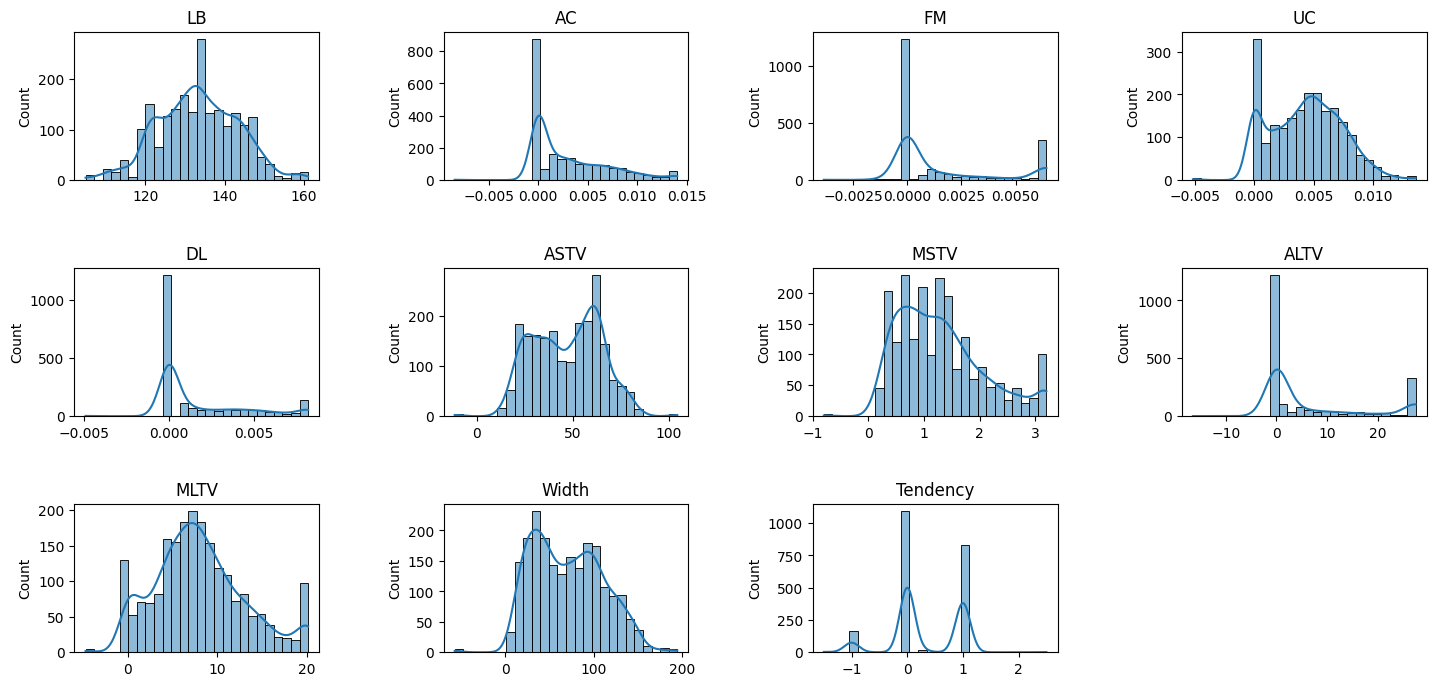

In [ ]:
# histograms
plt.figure(figsize=(15, 7.5))
for i, column in enumerate(df.columns):
    rows = (len(df.columns) + 3) // 4
    plt.subplot(rows, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.xlabel('')
plt.tight_layout(pad=3.0)
plt.show()

There are no categorical columns to apply bar charts or pie charts

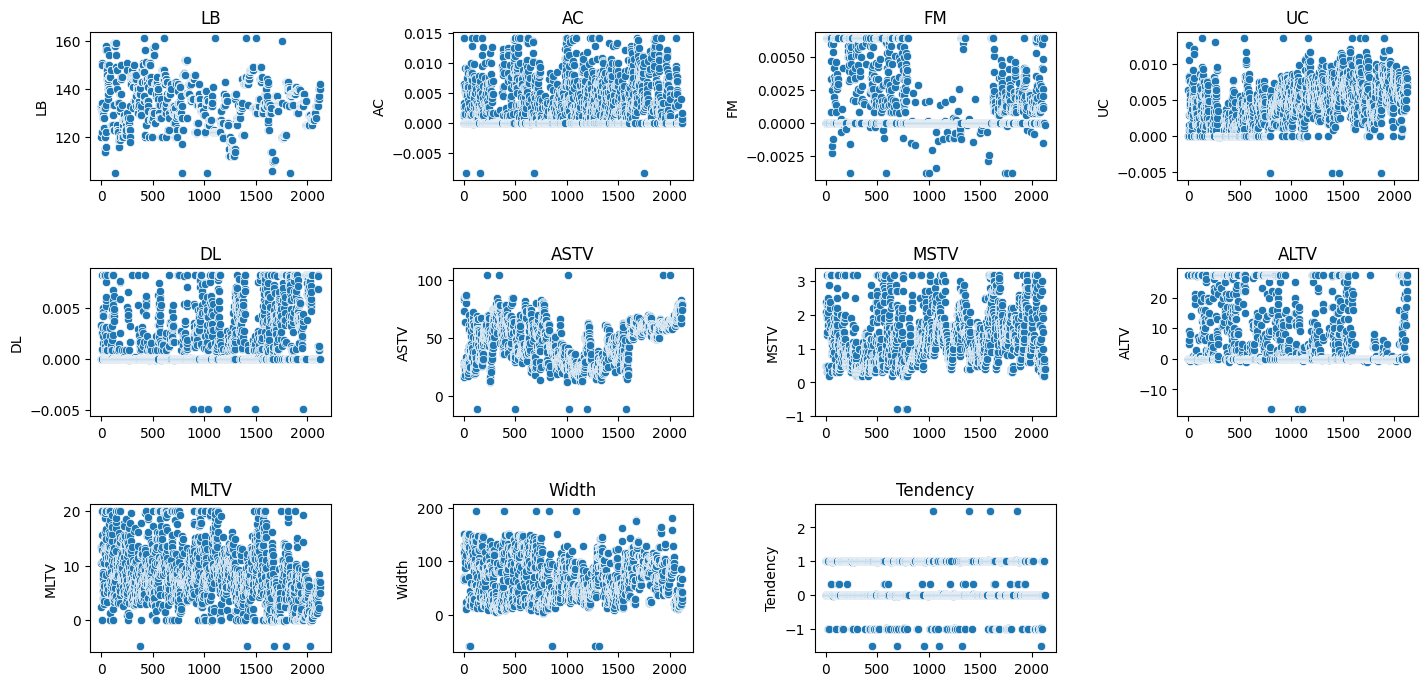

In [ ]:
# scatterplot
plt.figure(figsize=(15, 7.5))
for i, column in enumerate(df.columns):
    rows = (len(df.columns) + 3) // 4
    plt.subplot(rows, 4, i + 1)

    sns.scatterplot(x=df.index, y=df[column])
    plt.title(column)
    plt.xlabel('')
plt.tight_layout(pad=3.0)
plt.show()

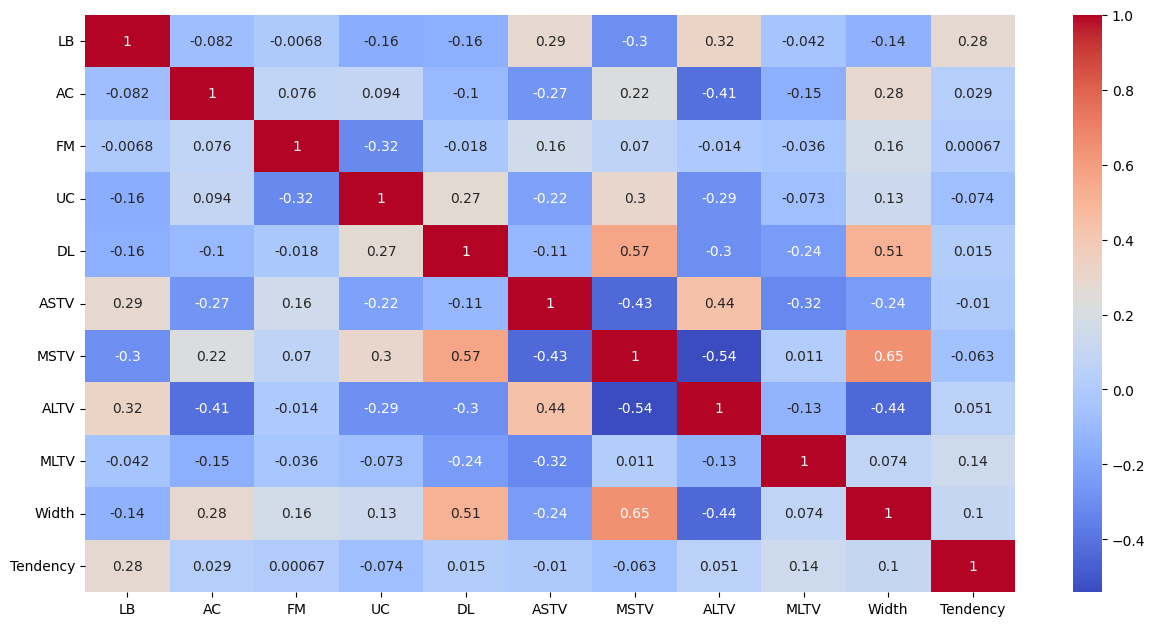

In [ ]:
# heatmap
plt.figure(figsize=(15, 7.5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Moderate positive correlation between MSTV & DL.

Moderate negative correlation between ALTV & MSTV

Most of them shows weak and no significant correlations at all.

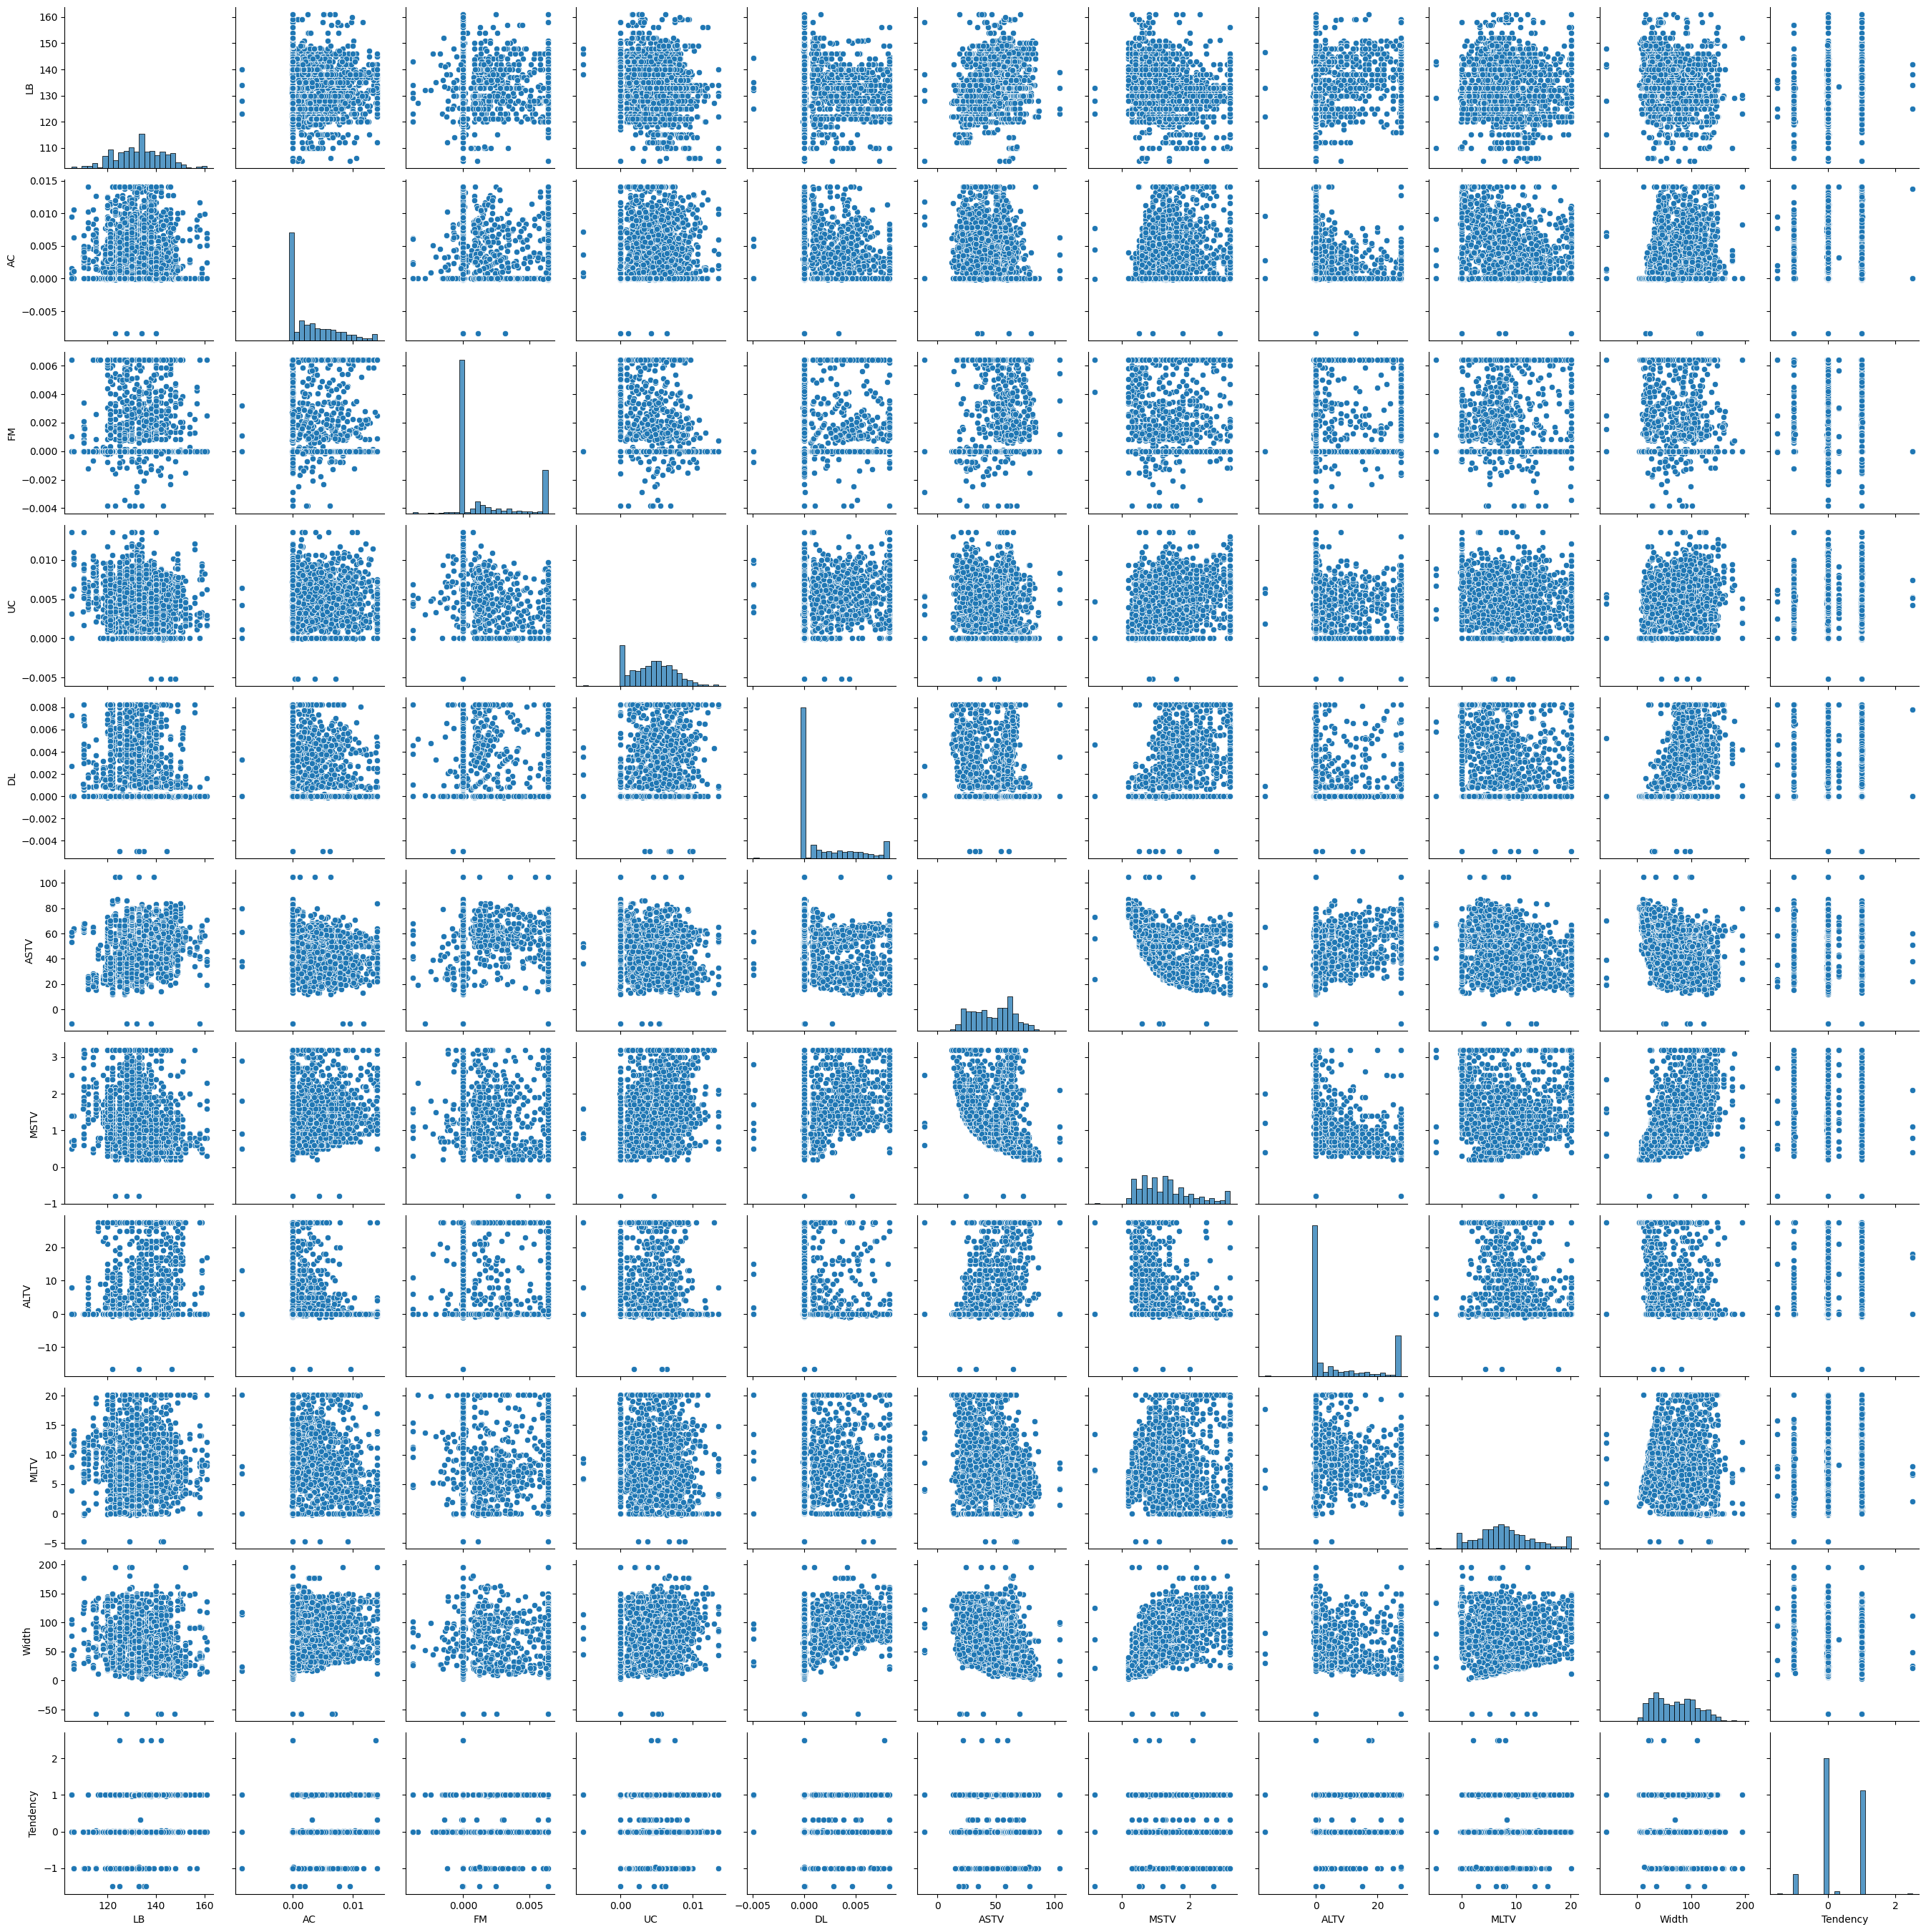

In [ ]:
# pairplots
sns.pairplot(df)
plt.show()

# Pattern recognition and Insights



*   MSTV & Width has strong positive correlation.
*   ASTV related to ALTV.
*   DL & MSTV are positively correlated.

*   MSTV - (ALTV & ASTV) are negatively correlated.

Most of them are weakly correlated, Further analysis could explore non linear relations between variables.



